In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


In [3]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.06MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 59.4MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.97MB/s]


In [4]:
image,level=train_data[0]

image,level
level

9

he order of our current tensor is often referred to as ```CHW``` (Color Channels, Height, Width).

There's debate on whether images should be represented as ```CHW``` (color channels first) or HWC (color channels last).

PyTorch generally accepts ```NCHW``` (channels first) as the default for many operators.

However, PyTorch also explains that ```NHWC``` (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [5]:
image.shape

len(train_data.data)

dir(train_data)

train_data.data

train_data.classes

len(train_data), len(train_data.targets), len(test_data), len(test_data.targets),

(60000, 60000, 10000, 10000)

In [6]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image Shape torch.Size([1, 28, 28])


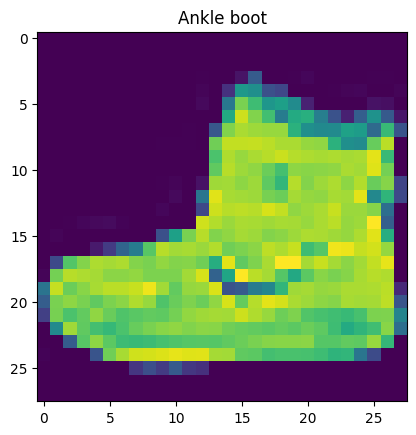

In [7]:
import matplotlib.pyplot as plt
image,lebel=train_data[0]
print(f"Image Shape {image.shape}")
plt.imshow(image.squeeze()) #remove extra 1 dim
plt.title(class_name[lebel]);


Text(0.5, 1.0, 'Random Tensor image with size (20, 22) ')

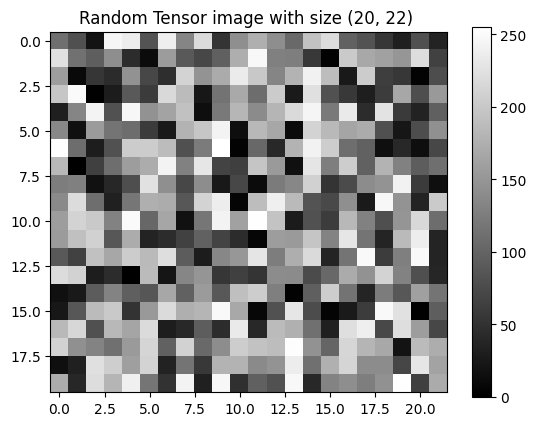

In [8]:
H,W= 20,22
fake_tensor_data=torch.rand(H,W)
fake_tensor_data=torch.randint(0,256, (H,W), dtype=torch.float32) # it will make tensor within 0->255
plt.imshow(fake_tensor_data,cmap='gray')
plt.colorbar()
plt.title(f"Random Tensor image with size {H, W} ")

In [9]:
fake_tensor_data=fake_tensor_data/255
fake_tensor_data

tensor([[0.4353, 0.3137, 0.0745, 0.9647, 0.9294, 0.3255, 0.9333, 0.5216, 0.8588,
         0.2078, 0.5608, 0.6863, 0.5569, 0.4157, 0.7608, 0.8627, 0.3804, 0.3255,
         0.2118, 0.1216, 0.3137, 0.1373],
        [0.8784, 0.4431, 0.3686, 0.5569, 0.1765, 0.0431, 0.6118, 0.3490, 0.2784,
         0.3765, 0.6824, 0.9725, 0.5020, 0.4941, 0.2235, 0.0078, 0.7922, 0.6588,
         0.6314, 0.5882, 0.8667, 0.2549],
        [0.6157, 0.0353, 0.2118, 0.1686, 0.5725, 0.2784, 0.1804, 0.8314, 0.5804,
         0.6706, 0.9216, 0.7843, 0.5216, 0.7059, 0.9451, 0.7412, 0.0980, 0.8000,
         0.2431, 0.2157, 0.0118, 0.3020],
        [0.7765, 0.9804, 0.0039, 0.1098, 0.3529, 0.2314, 0.8510, 0.7333, 0.0902,
         0.4510, 0.6627, 0.4275, 0.7961, 0.1020, 0.8784, 0.3176, 0.2235, 0.1176,
         0.2392, 0.6549, 0.3059, 0.6000],
        [0.1216, 0.5216, 0.9569, 0.3176, 0.9686, 0.5725, 0.6431, 0.7569, 0.0549,
         0.4745, 0.7137, 0.5451, 0.7098, 0.8549, 0.9608, 0.4745, 0.9176, 0.1725,
         0.8941, 0.227

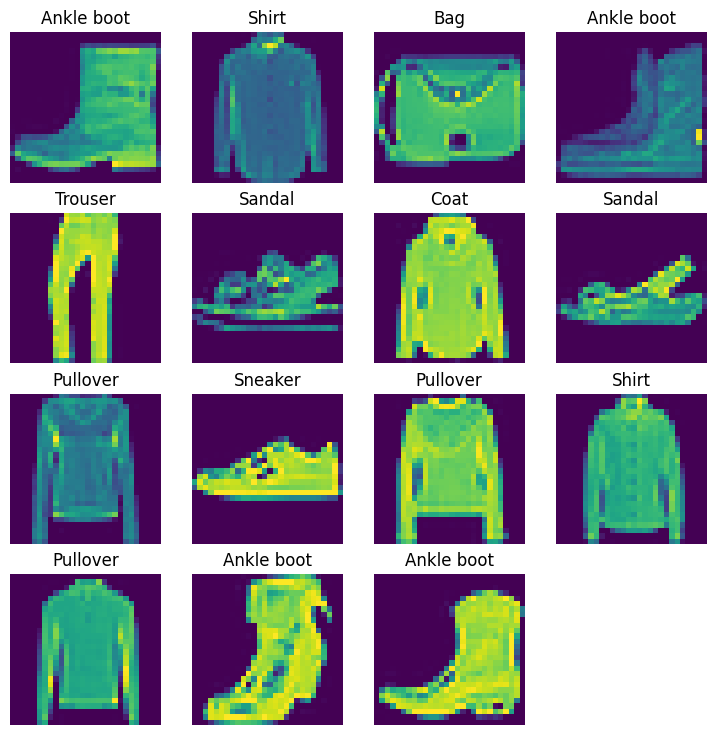

In [10]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
row, col= 4 , 4

for i in range(1, row*col):
    index=torch.randint(0,len(train_data),size=[1]).item()
    image, lebel= train_data[index]
    fig.add_subplot(row, col, i)
    plt.title(class_name[lebel])
    plt.imshow(image.squeeze())
    plt.axis(False)
    
    



In [11]:
torch.randint(0,10, size=[1]).item()

2

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cc90b6d7050>, <torch.utils.data.dataloader.DataLoader object at 0x7cc813d21c90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:


# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

len(train_features_batch)
len(train_labels_batch)
dir(train_features_batch)



['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__red

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


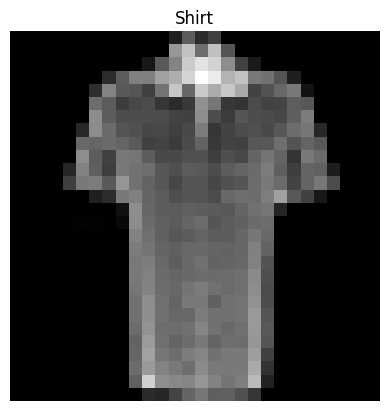

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

Create a Baseline model just 2 layer

In [15]:
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)

x.shape, output.shape

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
